# Repaso acerca del uso de Python

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.coordinates as coord
import astropy.units as u
import urllib2
%matplotlib inline

## Actividad 1

Estudiar la distribución espacial de las nebulosas de emisión o regiones HII en nuestra Galaxia. Buscamos 

In [87]:
data_url="https://raw.githubusercontent.com/rpmunoz/PentaUC/master/Astronomia%20era%20informacion/data/regiones_HII_WISE.csv"
#urllib.urlretrieve(data_url, "regiones_HII_WISE.csv")

data=pd.read_csv(data_url, sep=',', comment='#', header=0)
data.head()

,id,longitud,latitud,radio,distancia
0,1,0.649,-0.080,0.7,7.8
1,2,0.729,-0.103,0.1,8.5
2,3,9.599,0.199,3.5,5.2
3,4,9.613,0.206,3.5,5.2
4,5,9.614,0.200,3.5,5.2


Las columnas longitud y latitud se refiere a la posicion en que vemos las regiones HII desde nuestra posición en la Galaxia. La longitud y latitud galáctica son parte de lo que llamamos sistema de coordenadas galácticas, en le cual el Sol se encuentra en el centro y el centro galácico se ubica a longitud=0º, latitud=0º y a una distancia de 8 kpc.

In [93]:
lon = coord.Angle(data['longitud']*u.degree)
lat = coord.Angle(data['latitud']*u.degree)
d = coord.Distance(data['distancia'], u.kpc)

print "Longitud galactica: ", lon
print "Latitud galactica: ", lat
print "Distancia desde el Sol: ", d

Longitud galactica:  [u'0d38m56.4s' u'0d43m44.4s' u'9d35m56.4s' ..., u'358d56m16.8s'
 u'358d58m55.2s' u'359d09m39.6s']
Latitud galactica:  [u'-0d04m48s' u'-0d06m10.8s' u'0d11m56.4s' ..., u'-0d01m48s' u'-0d01m48s'
 u'-0d02m13.2s']
Distancia desde el Sol:  [ 7.8  8.5  5.2 ...,  8.5  8.5  8.5] kpc


Use las columnas longitud y distancia para graficar la posicion de la regiones HII. Haga un gráfico polar y use puntos o circulos para mostrar las regiones HII en el gráfico. Use

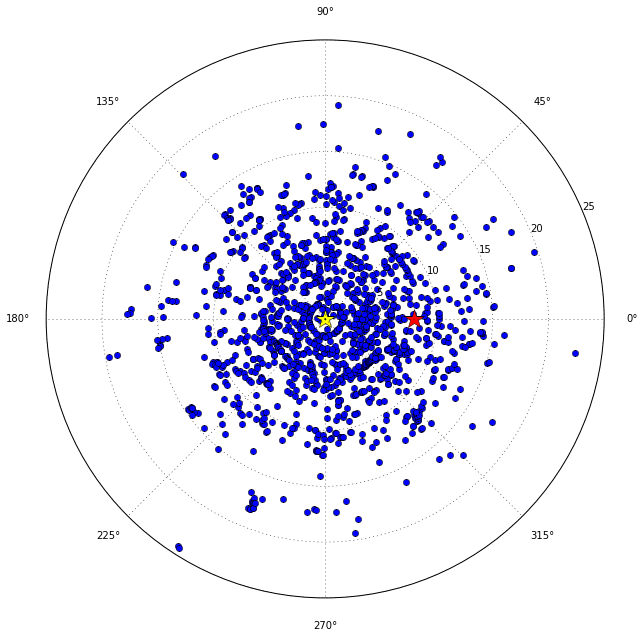

In [90]:
#fig,ax=plt.subplots(figsize=(10,10))
#ax = plt.axes(polar="true")

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="polar")
plt.plot(lon, d, marker='o', linestyle='None')
plt.plot([0],[0], marker='*', markersize=20, color='yellow') # Posicion de Sol con estrella amarilla
plt.plot([0],[8], marker='*', markersize=20, color='red') # Posicion del Sol con estrella roja

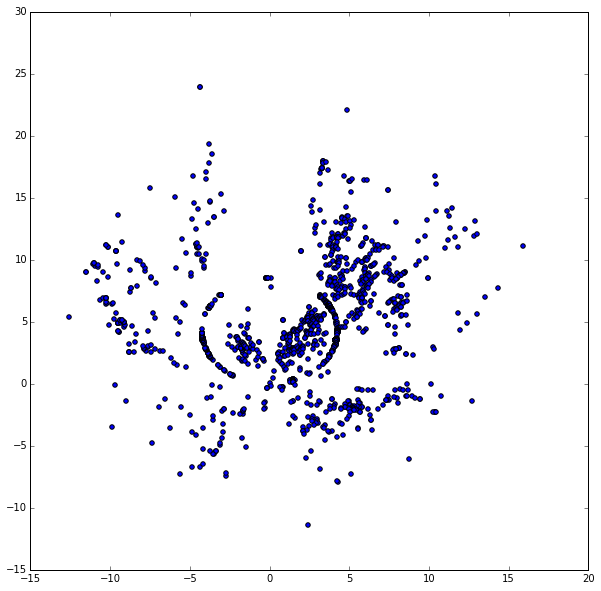

In [75]:
x=data['distancia']*np.sin(data['longitud']*np.pi/180)
y=data['distancia']*np.cos(data['longitud']*np.pi/180)

fig,ax=plt.subplots(figsize=(10,10))
plt.scatter(x,y,marker='o')

## Actividad 2

Use tanto la longitud como la latitud galactica para graficar la distribución espacial de las regiones HII en la galaxia. En esta oportunidad, en vez de usar la proyección Polar usaremos una llamada Mollweyd. Para ello, reemplace el comando projection="polar" por projection="mollweide"

![Imagen de proyeccion Mollweyd](https://octodex.github.com/images/yaktocat.png)

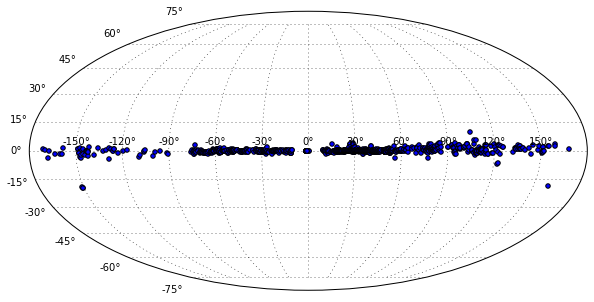

In [96]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="mollweide")

ax.scatter(lon.wrap_at(180*u.degree).radian, lat.radian)
ax.grid(True)

## Actividad 3

Hacer un histograma de la distribucion